In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
data = pd.read_csv('jena_climate_2009_2016.csv')
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Check the data types to see if we need to change any. Turns out all the columns except date_time are appropriately typed.

In [59]:
data.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

A look at the definitions of the various columns on the [Kaggle page](https://www.kaggle.com/datasets/mnassrib/jena-climate) tells us that 
1. TPot is simply T in degrees Kelvin, so we can drop it and
2. VPdef is the vapour pressure deficit, which is simply the difference between VPMax (max vapour pressure) and VPact (actual vapour pressure). Therefore there's no need to have that as a feature. (it could make an interesting target, though.)

In [60]:
data = data.drop('Tpot (K)', axis=1)

Rename the columns with more readable titles

In [61]:
data.columns


Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [62]:
renamer = {
    'Date Time': "date_time",
    'p (mbar)': "pressure", # air pressure in millibars
    'T (degC)': "temp", # air temperature in degrees Celsius
    'Tdew (degC)': "dew_temp", # dew temperature in degrees Celsius
    'rh (%)': "rel_hum", # relative humidity
    'VPmax (mbar)': "max_vap_press", # saturation vapour pressure in millibars
    'VPact (mbar)': "actual_vap_press", # actual vapour pressure in millibars
    'VPdef (mbar)': "vap_press_deficit", # vapour pressure deficit in millibars
    'sh (g/kg)': "spec_hum", # specific humidity g of water in kg of air
    'H2OC (mmol/mol)': "wv_conc", # water vapour concentration millimoles of water/mole of air
    'rho (g/m**3)': "air_density", # density of air
    'wv (m/s)': "wind_speed",
    'max. wv (m/s)': "max_wind_speed",
    'wd (deg)': "wind_direction"
}

new_columns = [renamer[column] for column in data.columns]

Check if new names are aligned properly with old ones

In [63]:
for i, column in enumerate(data.columns):
    print(f'{column}:   {new_columns[i]}')

Date Time:   date_time
p (mbar):   pressure
T (degC):   temp
Tdew (degC):   dew_temp
rh (%):   rel_hum
VPmax (mbar):   max_vap_press
VPact (mbar):   actual_vap_press
VPdef (mbar):   vap_press_deficit
sh (g/kg):   spec_hum
H2OC (mmol/mol):   wv_conc
rho (g/m**3):   air_density
wv (m/s):   wind_speed
max. wv (m/s):   max_wind_speed
wd (deg):   wind_direction


In [64]:
data.columns = new_columns
data.head()

,date_time,pressure,temp,dew_temp,rel_hum,max_vap_press,actual_vap_press,vap_press_deficit,spec_hum,wv_conc,air_density,wind_speed,max_wind_speed,wind_direction
0,01.01.2009 00:10:00,996.52,-8.02,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


We check for missing values and find that there are none. 

In [65]:
data.isnull().sum()


date_time            0
pressure             0
temp                 0
dew_temp             0
rel_hum              0
max_vap_press        0
actual_vap_press     0
vap_press_deficit    0
spec_hum             0
wv_conc              0
air_density          0
wind_speed           0
max_wind_speed       0
wind_direction       0
dtype: int64

Convert date_time to type datetime and extract values for various timescales

In [66]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%d.%m.%Y %H:%M:%S')

data['year'] = [value.year for value in data['date_time']]
data['month'] = [value.month for value in data['date_time']]
data['day'] = [value.day for value in data['date_time']]
data['hour'] = [value.hour for value in data['date_time']]
data['minute'] = [value.minute for value in data['date_time']]


In [67]:
def circularise(series):
    # shrink to 0 to 2*pi
    min = np.min(series)
    max = np.max(series)
    series = series - min
    series = series*2*np.pi/max

    sine = np.sin(series)
    cosine = np.cos(series)

    return (sine, cosine)




# create modellable feature list and add sine and cosine features


In [68]:
circular_features = ['month', 'day', 'hour', 'minute', 'wind_direction']

for feature in circular_features:
    sine, cosine = circularise(data[feature])
    data[f'{feature}_sine'] = sine
    data[f'{feature}_sine_slant'] = np.sign(cosine)


In [90]:
data.columns


Index(['date_time', 'pressure', 'temp', 'dew_temp', 'rel_hum', 'max_vap_press',
       'actual_vap_press', 'vap_press_deficit', 'spec_hum', 'wv_conc',
       'air_density', 'wind_speed', 'max_wind_speed', 'wind_direction', 'year',
       'month', 'day', 'hour', 'minute', 'month_sine', 'month_sine_slant',
       'day_sine', 'day_sine_slant', 'hour_sine', 'hour_sine_slant',
       'minute_sine', 'minute_sine_slant', 'wind_direction_sine',
       'wind_direction_sine_slant'],
      dtype='object')

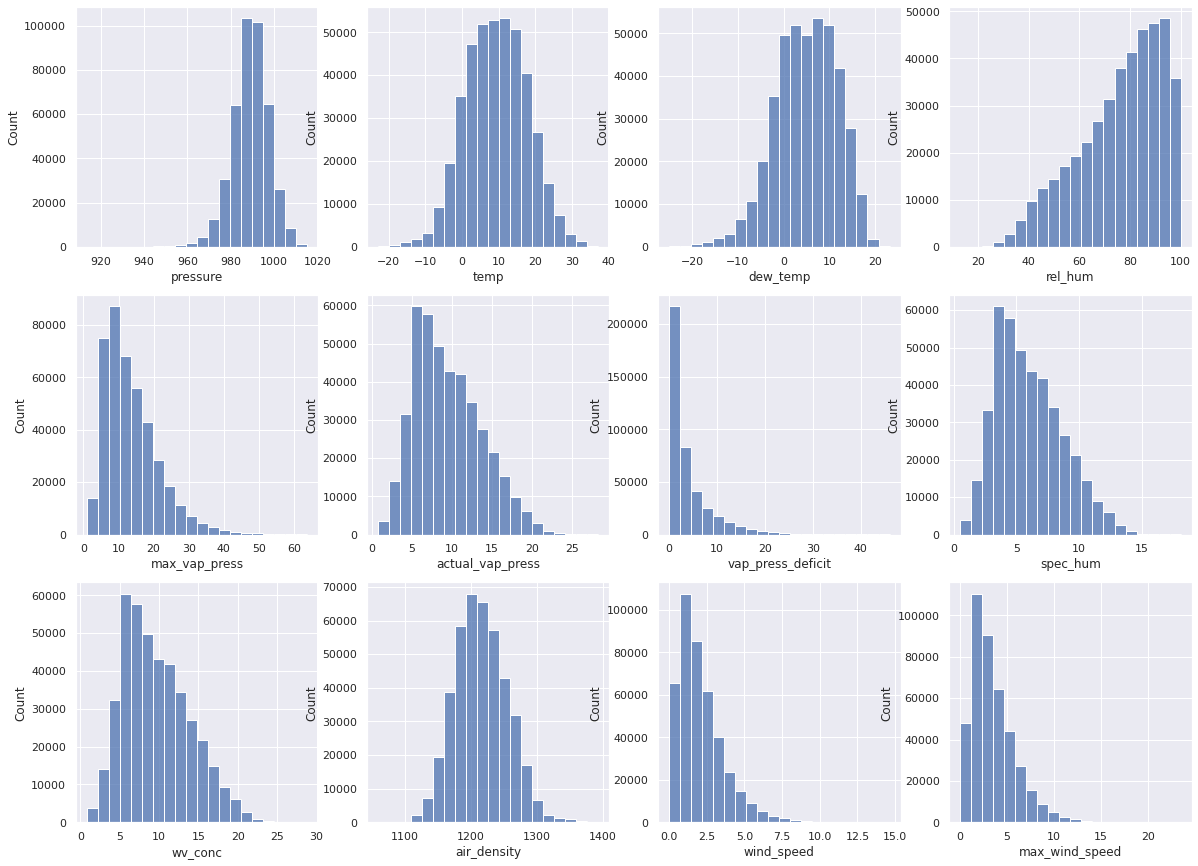

In [99]:
sns.set_theme()
nrows = 3
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,15)
features = ['pressure', 'temp', 'dew_temp', 'rel_hum', 'max_vap_press',\
       'actual_vap_press', 'vap_press_deficit', 'spec_hum', 'wv_conc',\
       'air_density', 'wind_speed', 'max_wind_speed']
features.reverse()

for row in range(nrows):
    for col in range(ncols):
        feature = features.pop()
        sns.histplot(data[feature], bins=20, ax=axs[row,col])


In [95]:
features = ['pressure', 'temp', 'dew_temp', 'rel_hum', 'max_vap_press',\
       'actual_vap_press', 'vap_press_deficit', 'spec_hum', 'wv_conc',\
       'air_density', 'wind_speed', 'max_wind_speed']
features.reverse()
features

['max_wind_speed',
 'wind_speed',
 'air_density',
 'wv_conc',
 'spec_hum',
 'vap_press_deficit',
 'actual_vap_press',
 'max_vap_press',
 'rel_hum',
 'dew_temp',
 'temp',
 'pressure']

In [94]:
features

EDA
- line charts over years for different times of the day
- temps in different months for different times of the day
- distribution of wind direction

FE
- Split date time
    - year index (?)
    - month
    - week of month
    (don't use week of year as that will need 53 columns. splitting it out into month and week of month needs just 16 columns)
    - am/pm (?)
    - hours as categories?
    - year
    - convert months, hours, and minutes to circular ordinal (from ints)
- anomalies
- drop vapour pressure deficit?
- featurise direction (ordinal, circular) https://www.isical.ac.in/~asu/TR/TechRepASU201701.pdf 






In [ ]:
# Make dictionary for months (is it needed if I'm going to make months circular ordinal?)
# months_list = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
# months_dict = {i:months_list[i-1] for i in range(1,13)}